In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filename='/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv'

df=pd.read_csv(filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [68]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [69]:
## one hot encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse=False)

col=['Sex','BP','Cholesterol']

df_t=encoder.fit_transform(df[col])
encoded_columns = encoder.get_feature_names_out(col)

# Create DataFrame with one-hot encoded columns
df_encoded = pd.DataFrame(df_t, columns=encoded_columns)

# Concatenate with numerical columns
df_encoded = pd.concat([df_encoded, df.select_dtypes(include=['number'])], axis=1)
df_encoded_2= pd.concat([df_encoded, df['Drug']], axis=1)

In [70]:
df_encoded_2.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K,Drug
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,23,25.355,drugY
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47,13.093,drugC
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47,10.114,drugC
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,28,7.798,drugX
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,61,18.043,drugY


In [71]:
from sklearn.model_selection import train_test_split

X=df_encoded_2.loc[ : , df_encoded_2.columns != 'Drug'].values
y=df_encoded_2['Drug'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

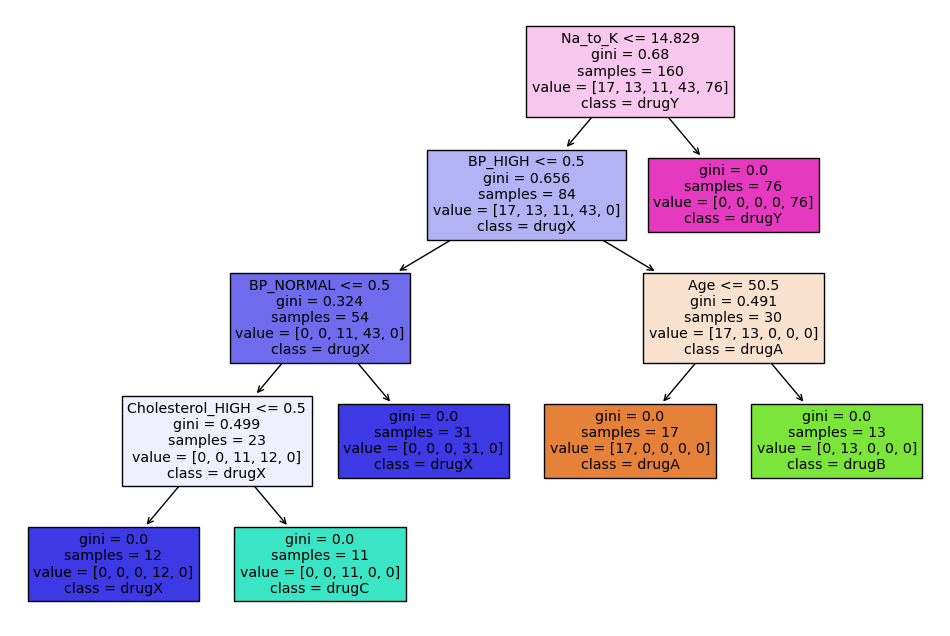

Decision Tree:
|--- Na_to_K <= 14.83
|   |--- BP_HIGH <= 0.50
|   |   |--- BP_NORMAL <= 0.50
|   |   |   |--- Cholesterol_HIGH <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Cholesterol_HIGH >  0.50
|   |   |   |   |--- class: drugC
|   |   |--- BP_NORMAL >  0.50
|   |   |   |--- class: drugX
|   |--- BP_HIGH >  0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: drugY



In [73]:
import matplotlib.pyplot as plt


clf.fit(X_train,y_train)
feature_names = df_encoded_2.columns[df_encoded_2.columns !='Drug']
class_names=list(df_encoded_2['Drug'].unique())
class_names.sort()
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(feature_names),class_names= class_names, filled=True)
plt.show()
# Print decision tree
tree_text = export_text(clf, feature_names=list(feature_names))
print("Decision Tree:")
print(tree_text)

In [74]:
y_pred=clf.predict(X_test)


In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
